# Poisson-Nernst-Planck (PNP) Transient Disturbed Model

Poisson equation describing the electric potential gradient is:

$$\nabla \cdot (-\epsilon \epsilon_0 \nabla \phi)  = F \sum_{i=1}^{N} z_i c_i$$

Nernst-Planck equation (including eletrophoretic and diffusivity terms) :
$$ \frac{\partial c_i}{\partial t} = \nabla \cdot \left( \frac{z_i}{|z_i|} u_i c_i \nabla \phi + D_i \nabla c_i \right) +
\sum_{j=1}^{N} \left( -k_{aij} c_i c_j + k_{dij} c_{ij} \right)$$


We would like to create a 1-dimensional, transient model with three species, sulfate, a cation, and an anion. On the left hand side is a gel with the sulfate immobilized. On the right is a free solution with only the cations and anions.

Under our conditions, the Poisson equation becomes:

$$\begin{align}
-\epsilon \epsilon_0 \frac{\partial^2 \phi}{\partial x^2} &= F \left( -C_s + C_c - C_a \right)  \\
\frac{\partial^2 \phi}{\partial x^2}                      &= \frac{F}{-\epsilon \epsilon_0} \left( -C_s + C_c - C_a \right) \\
\end{align} $$

Nondimensionalization brings:
$$ \frac{\partial^2 y}{\partial x^2}= \frac{F}{-\epsilon \epsilon_0} \frac{\left( -C_s + C_c - C_a \right)}{c_{j,0}} $$

The Nernst-Planck equation on the gel side becomes:

$$\begin{align}
\frac{\partial C_s}{\partial t} &=
& -k_a C_s C_c + k_d (C_{j,0} - C_s) \\
\frac{\partial C_c}{\partial t} &=
\frac{\partial}{\partial x} \left( + \mu_c C_c \frac{\partial \phi}{\partial x} + D_c \frac{\partial C_c}{\partial x} \right)
& -k_a C_c C_s + k_d (C_{j,0} - C_s) \\
\frac{\partial C_a}{\partial t} &=
\frac{\partial}{\partial x} \left( - \mu_a C_a \frac{\partial \phi}{\partial x} + D_a \frac{\partial C_a}{\partial x} \right)
& \\
\end{align}$$

Where $C_{j,0}$ is the total concentration of sulfates, bound and unbound. Therefore the difference, $(C_{j,0} - C_s)$, represents the number of bound cation-sulfate pairs.

We apply the spacial derivative to the electrophoretic and diffusion terms resulting in:

$$\begin{align}
\frac{\partial C_s}{\partial t} &=
& -k_a C_s C_c + k_d (C_{j,0} - C_s) \\
\frac{\partial C_c}{\partial t} &=
+ \mu_c C_c \frac{\partial^2 \phi}{\partial x^2} + \mu_c \frac{\partial C_c}{\partial x} \frac{\partial \phi}{\partial x}
+ D_c \frac{\partial^2 C_c}{\partial x^2} 
& -k_a C_c C_s + k_d (C_{j,0} - C_s) \\
\frac{\partial C_a}{\partial t} &=
- \mu_a C_a \frac{\partial^2 \phi}{\partial x^2} - \mu_a \frac{\partial C_a}{\partial x} \frac{\partial \phi}{\partial x}
+ D_a \frac{\partial^2 C_a}{\partial x^2}
& \\
\end{align}$$

The Nernst-Planck equation on the salt solution side, given there are no sulfate bonding sites ($C_s = 0$), becomes:

$$\begin{align}
\frac{\partial C_s}{\partial t} &=0 \\
\frac{\partial C_c}{\partial t} &=
+ \mu_c C_c \frac{\partial^2 \phi}{\partial x^2} + \mu_c \frac{\partial C_c}{\partial x} \frac{\partial \phi}{\partial x}
+ D_c \frac{\partial^2 C_c}{\partial x^2}\\
\frac{\partial C_a}{\partial t} &=
- \mu_a C_a \frac{\partial^2 \phi}{\partial x^2} - \mu_a \frac{\partial C_a}{\partial x} \frac{\partial \phi}{\partial x}
+ D_a \frac{\partial^2 C_a}{\partial x^2}
& \\
\end{align}$$

The variables are:

$$\begin{align}
\phi &\equiv \text{Electric potential} \\
\epsilon &\equiv \text{permittivity} \\
\epsilon_0 &\equiv \text{permittivity in vacuum} \\
F &\equiv \text{Faraday's constant} \\
C &\equiv \text{concentration} \\
D &\equiv \text{diffusivity} \\
\mu &\equiv \text{eletrophoretic mobility} \\
k &\equiv \text{rate constant} \\
c &\equiv \text{cation} \\
a &\equiv \text{anion} \\
s &\equiv \text{sulfate} \\
\end{align}$$

## 1. Creating the Simulation

### 1.1 Initial Conditions


In [16]:
# Libraries
#------------------------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Space
#------------------------
n = 200 # number of mesh points on gel side (includes x[n] = 0, n+1 points total)
m = 200 # number of mesh points on salt side (includes x[n+1] = dx, m points total)
dx = 0.05
x = np.hstack((np.arange(-n*dx, dx, dx), np.arange(dx, m*dx + dx, dx)))

# Time
#------------------------
dt = 0.0005
time = np.arange(0, 30, dt)

print(dt/dx**2, "should be less than 0.5 if it is to be stable.")
    
# Model Parameters
#------------------------
# constants
F = 1
e = 1
e0 = 1
ua = 1
uc = 1
Da = 1
Dc = 1
k1 = 1
k2 = 10
K = k2/k1
P = 0.1
S = 0.1
Cc0 = P*K
Cs0 = Cc0/S



# initial condition (copied from steady-state)

Ph0 = [-1.83983590e+00, -1.83983034e+00, -1.83982476e+00, -1.83981917e+00,
       -1.83981353e+00, -1.83980785e+00, -1.83980210e+00, -1.83979628e+00,
       -1.83979038e+00, -1.83978437e+00, -1.83977825e+00, -1.83977200e+00,
       -1.83976561e+00, -1.83975906e+00, -1.83975235e+00, -1.83974545e+00,
       -1.83973835e+00, -1.83973104e+00, -1.83972350e+00, -1.83971571e+00,
       -1.83970765e+00, -1.83969931e+00, -1.83969067e+00, -1.83968172e+00,
       -1.83967242e+00, -1.83966276e+00, -1.83965272e+00, -1.83964228e+00,
       -1.83963141e+00, -1.83962009e+00, -1.83960829e+00, -1.83959600e+00,
       -1.83958317e+00, -1.83956979e+00, -1.83955583e+00, -1.83954125e+00,
       -1.83952602e+00, -1.83951010e+00, -1.83949347e+00, -1.83947609e+00,
       -1.83945792e+00, -1.83943891e+00, -1.83941903e+00, -1.83939823e+00,
       -1.83937647e+00, -1.83935370e+00, -1.83932986e+00, -1.83930492e+00,
       -1.83927880e+00, -1.83925146e+00, -1.83922283e+00, -1.83919286e+00,
       -1.83916146e+00, -1.83912859e+00, -1.83909415e+00, -1.83905809e+00,
       -1.83902031e+00, -1.83898074e+00, -1.83893928e+00, -1.83889586e+00,
       -1.83885036e+00, -1.83880269e+00, -1.83875275e+00, -1.83870042e+00,
       -1.83864560e+00, -1.83858815e+00, -1.83852796e+00, -1.83846489e+00,
       -1.83839880e+00, -1.83832954e+00, -1.83825697e+00, -1.83818092e+00,
       -1.83810123e+00, -1.83801772e+00, -1.83793020e+00, -1.83783849e+00,
       -1.83774238e+00, -1.83764166e+00, -1.83753611e+00, -1.83742550e+00,
       -1.83730957e+00, -1.83718809e+00, -1.83706077e+00, -1.83692734e+00,
       -1.83678751e+00, -1.83664097e+00, -1.83648739e+00, -1.83632644e+00,
       -1.83615776e+00, -1.83598098e+00, -1.83579572e+00, -1.83560156e+00,
       -1.83539807e+00, -1.83518482e+00, -1.83496133e+00, -1.83472711e+00,
       -1.83448165e+00, -1.83422440e+00, -1.83395480e+00, -1.83367226e+00,
       -1.83337615e+00, -1.83306583e+00, -1.83274062e+00, -1.83239980e+00,
       -1.83204263e+00, -1.83166831e+00, -1.83127603e+00, -1.83086493e+00,
       -1.83043411e+00, -1.82998262e+00, -1.82950947e+00, -1.82901363e+00,
       -1.82849402e+00, -1.82794949e+00, -1.82737885e+00, -1.82678086e+00,
       -1.82615421e+00, -1.82549753e+00, -1.82480938e+00, -1.82408827e+00,
       -1.82333262e+00, -1.82254078e+00, -1.82171103e+00, -1.82084157e+00,
       -1.81993049e+00, -1.81897583e+00, -1.81797549e+00, -1.81692732e+00,
       -1.81582904e+00, -1.81467826e+00, -1.81347250e+00, -1.81220914e+00,
       -1.81088546e+00, -1.80949859e+00, -1.80804554e+00, -1.80652318e+00,
       -1.80492823e+00, -1.80325726e+00, -1.80150668e+00, -1.79967274e+00,
       -1.79775150e+00, -1.79573887e+00, -1.79363053e+00, -1.79142200e+00,
       -1.78910856e+00, -1.78668531e+00, -1.78414710e+00, -1.78148856e+00,
       -1.77870406e+00, -1.77578773e+00, -1.77273344e+00, -1.76953477e+00,
       -1.76618502e+00, -1.76267718e+00, -1.75900396e+00, -1.75515770e+00,
       -1.75113043e+00, -1.74691384e+00, -1.74249923e+00, -1.73787754e+00,
       -1.73303931e+00, -1.72797466e+00, -1.72267332e+00, -1.71712454e+00,
       -1.71131714e+00, -1.70523947e+00, -1.69887938e+00, -1.69222422e+00,
       -1.68526081e+00, -1.67797545e+00, -1.67035387e+00, -1.66238121e+00,
       -1.65404205e+00, -1.64532033e+00, -1.63619937e+00, -1.62666185e+00,
       -1.61668977e+00, -1.60626445e+00, -1.59536653e+00, -1.58397591e+00,
       -1.57207176e+00, -1.55963250e+00, -1.54663579e+00, -1.53305850e+00,
       -1.51887670e+00, -1.50406568e+00, -1.48859987e+00, -1.47245290e+00,
       -1.45559754e+00, -1.43800571e+00, -1.41964849e+00, -1.40049610e+00,
       -1.38051787e+00, -1.35968228e+00, -1.33795697e+00, -1.31530868e+00,
       -1.29170332e+00, -1.26710596e+00, -1.24148082e+00, -1.21479130e+00,
       -1.18700000e+00, -1.15923370e+00, -1.13218594e+00, -1.10583330e+00,
       -1.08015345e+00, -1.05512507e+00, -1.03072781e+00, -1.00694222e+00,
       -9.83749656e-01, -9.61132297e-01, -9.39073044e-01, -9.17555501e-01,
       -8.96563925e-01, -8.76083197e-01, -8.56098779e-01, -8.36596689e-01,
       -8.17563467e-01, -7.98986149e-01, -7.80852241e-01, -7.63149694e-01,
       -7.45866883e-01, -7.28992587e-01, -7.12515966e-01, -6.96426545e-01,
       -6.80714199e-01, -6.65369131e-01, -6.50381863e-01, -6.35743219e-01,
       -6.21444312e-01, -6.07476531e-01, -5.93831529e-01, -5.80501216e-01,
       -5.67477742e-01, -5.54753492e-01, -5.42321074e-01, -5.30173311e-01,
       -5.18303234e-01, -5.06704073e-01, -4.95369248e-01, -4.84292365e-01,
       -4.73467205e-01, -4.62887723e-01, -4.52548037e-01, -4.42442426e-01,
       -4.32565321e-01, -4.22911303e-01, -4.13475095e-01, -4.04251559e-01,
       -3.95235693e-01, -3.86422622e-01, -3.77807597e-01, -3.69385993e-01,
       -3.61153300e-01, -3.53105124e-01, -3.45237179e-01, -3.37545290e-01,
       -3.30025383e-01, -3.22673486e-01, -3.15485725e-01, -3.08458320e-01,
       -3.01587585e-01, -2.94869924e-01, -2.88301825e-01, -2.81879863e-01,
       -2.75600696e-01, -2.69461060e-01, -2.63457771e-01, -2.57587718e-01,
       -2.51847866e-01, -2.46235252e-01, -2.40746980e-01, -2.35380224e-01,
       -2.30132224e-01, -2.25000284e-01, -2.19981770e-01, -2.15074111e-01,
       -2.10274794e-01, -2.05581364e-01, -2.00991424e-01, -1.96502629e-01,
       -1.92112692e-01, -1.87819374e-01, -1.83620491e-01, -1.79513905e-01,
       -1.75497529e-01, -1.71569323e-01, -1.67727293e-01, -1.63969490e-01,
       -1.60294009e-01, -1.56698986e-01, -1.53182603e-01, -1.49743078e-01,
       -1.46378673e-01, -1.43087687e-01, -1.39868456e-01, -1.36719354e-01,
       -1.33638792e-01, -1.30625215e-01, -1.27677102e-01, -1.24792968e-01,
       -1.21971358e-01, -1.19210851e-01, -1.16510056e-01, -1.13867613e-01,
       -1.11282193e-01, -1.08752493e-01, -1.06277242e-01, -1.03855195e-01,
       -1.01485134e-01, -9.91658664e-02, -9.68962283e-02, -9.46750787e-02,
       -9.25013019e-02, -9.03738064e-02, -8.82915238e-02, -8.62534089e-02,
       -8.42584387e-02, -8.23056122e-02, -8.03939496e-02, -7.85224919e-02,
       -7.66903005e-02, -7.48964567e-02, -7.31400610e-02, -7.14202328e-02,
       -6.97361102e-02, -6.80868491e-02, -6.64716231e-02, -6.48896228e-02,
       -6.33400557e-02, -6.18221455e-02, -6.03351321e-02, -5.88782707e-02,
       -5.74508317e-02, -5.60521006e-02, -5.46813769e-02, -5.33379745e-02,
       -5.20212210e-02, -5.07304573e-02, -4.94650375e-02, -4.82243283e-02,
       -4.70077089e-02, -4.58145707e-02, -4.46443166e-02, -4.34963614e-02,
       -4.23701308e-02, -4.12650614e-02, -4.01806007e-02, -3.91162063e-02,
       -3.80713459e-02, -3.70454972e-02, -3.60381471e-02, -3.50487922e-02,
       -3.40769377e-02, -3.31220979e-02, -3.21837956e-02, -3.12615617e-02,
       -3.03549353e-02, -2.94634634e-02, -2.85867005e-02, -2.77242084e-02,
       -2.68755563e-02, -2.60403201e-02, -2.52180825e-02, -2.44084328e-02,
       -2.36109665e-02, -2.28252854e-02, -2.20509968e-02, -2.12877142e-02,
       -2.05350564e-02, -1.97926474e-02, -1.90601165e-02, -1.83370979e-02,
       -1.76232307e-02, -1.69181583e-02, -1.62215288e-02, -1.55329943e-02,
       -1.48522112e-02, -1.41788395e-02, -1.35125432e-02, -1.28529896e-02,
       -1.21998495e-02, -1.15527969e-02, -1.09115090e-02, -1.02756656e-02,
       -9.64494934e-03, -9.01904554e-03, -8.39764183e-03, -7.78042811e-03,
       -7.16709639e-03, -6.55734062e-03, -5.95085653e-03, -5.34734152e-03,
       -4.74649444e-03, -4.14801551e-03, -3.55160613e-03, -2.95696870e-03,
       -2.36380657e-03, -1.77182378e-03, -1.18072498e-03, -5.90215254e-04,
        8.88325803e-20]
Ph0 = np.array(Ph0)

Cc = Cs0*S*np.exp(-Ph0)
Ca = Cs0*S*np.exp(Ph0)
Cc = np.flip(Cc)
Ca = np.flip(Ca)
Cs = Cs0*(1+P*np.exp(-Ph0[:n+1]))**-1
Cs = np.hstack((Cs, np.zeros(m)))
totalCs = np.hstack((np.ones(n+1)*Cs0, np.ones(m)*0))

0.19999999999999996 should be less than 0.5 if it is to be stable.


### 1.2 Evolution Simulation

0.0
-60.00952979943452
-53.336605714360985
-47.25859013969237
-41.92566593241875
1.0
-37.26136904272695
-33.186050972069346
-29.625563778049276
-26.51344014892378
2.0
-23.791152670753803
-21.407639678315476
-19.318554538530023
-17.485446007421967
3.0
-15.874976106809573
-14.458223985728502
-13.210087263469427
-12.108772858431218
4.0
-11.13536265399589
-10.273439733020437
-9.508763855753719
-8.828987936987698
5.0
-8.223409610434919
-7.682753473281768
-7.19898049334602
-6.765121576382825
6.0
-6.375132611379399
-6.023768545672187
-5.7064742448330215
-5.41929008751024
7.0
-5.158770438827031
-4.9219133361807925
-4.706099904717315
-4.509042192841501
8.0
-4.328738278322489
-4.163433641431619
-4.011587932661448
-3.8718463791719167
9.0
-3.7430151769377766
-3.624040305653666
-3.5139892819518503
-3.4120354346069313
10.0
-3.317444344315127
-3.2295621414528677
-3.147805398959772
-3.0716523950781385
11.0
-3.0006355529369144
-2.934334891622598
-2.872372347068614
-2.8144068413776395
12.0
-2.7601299965

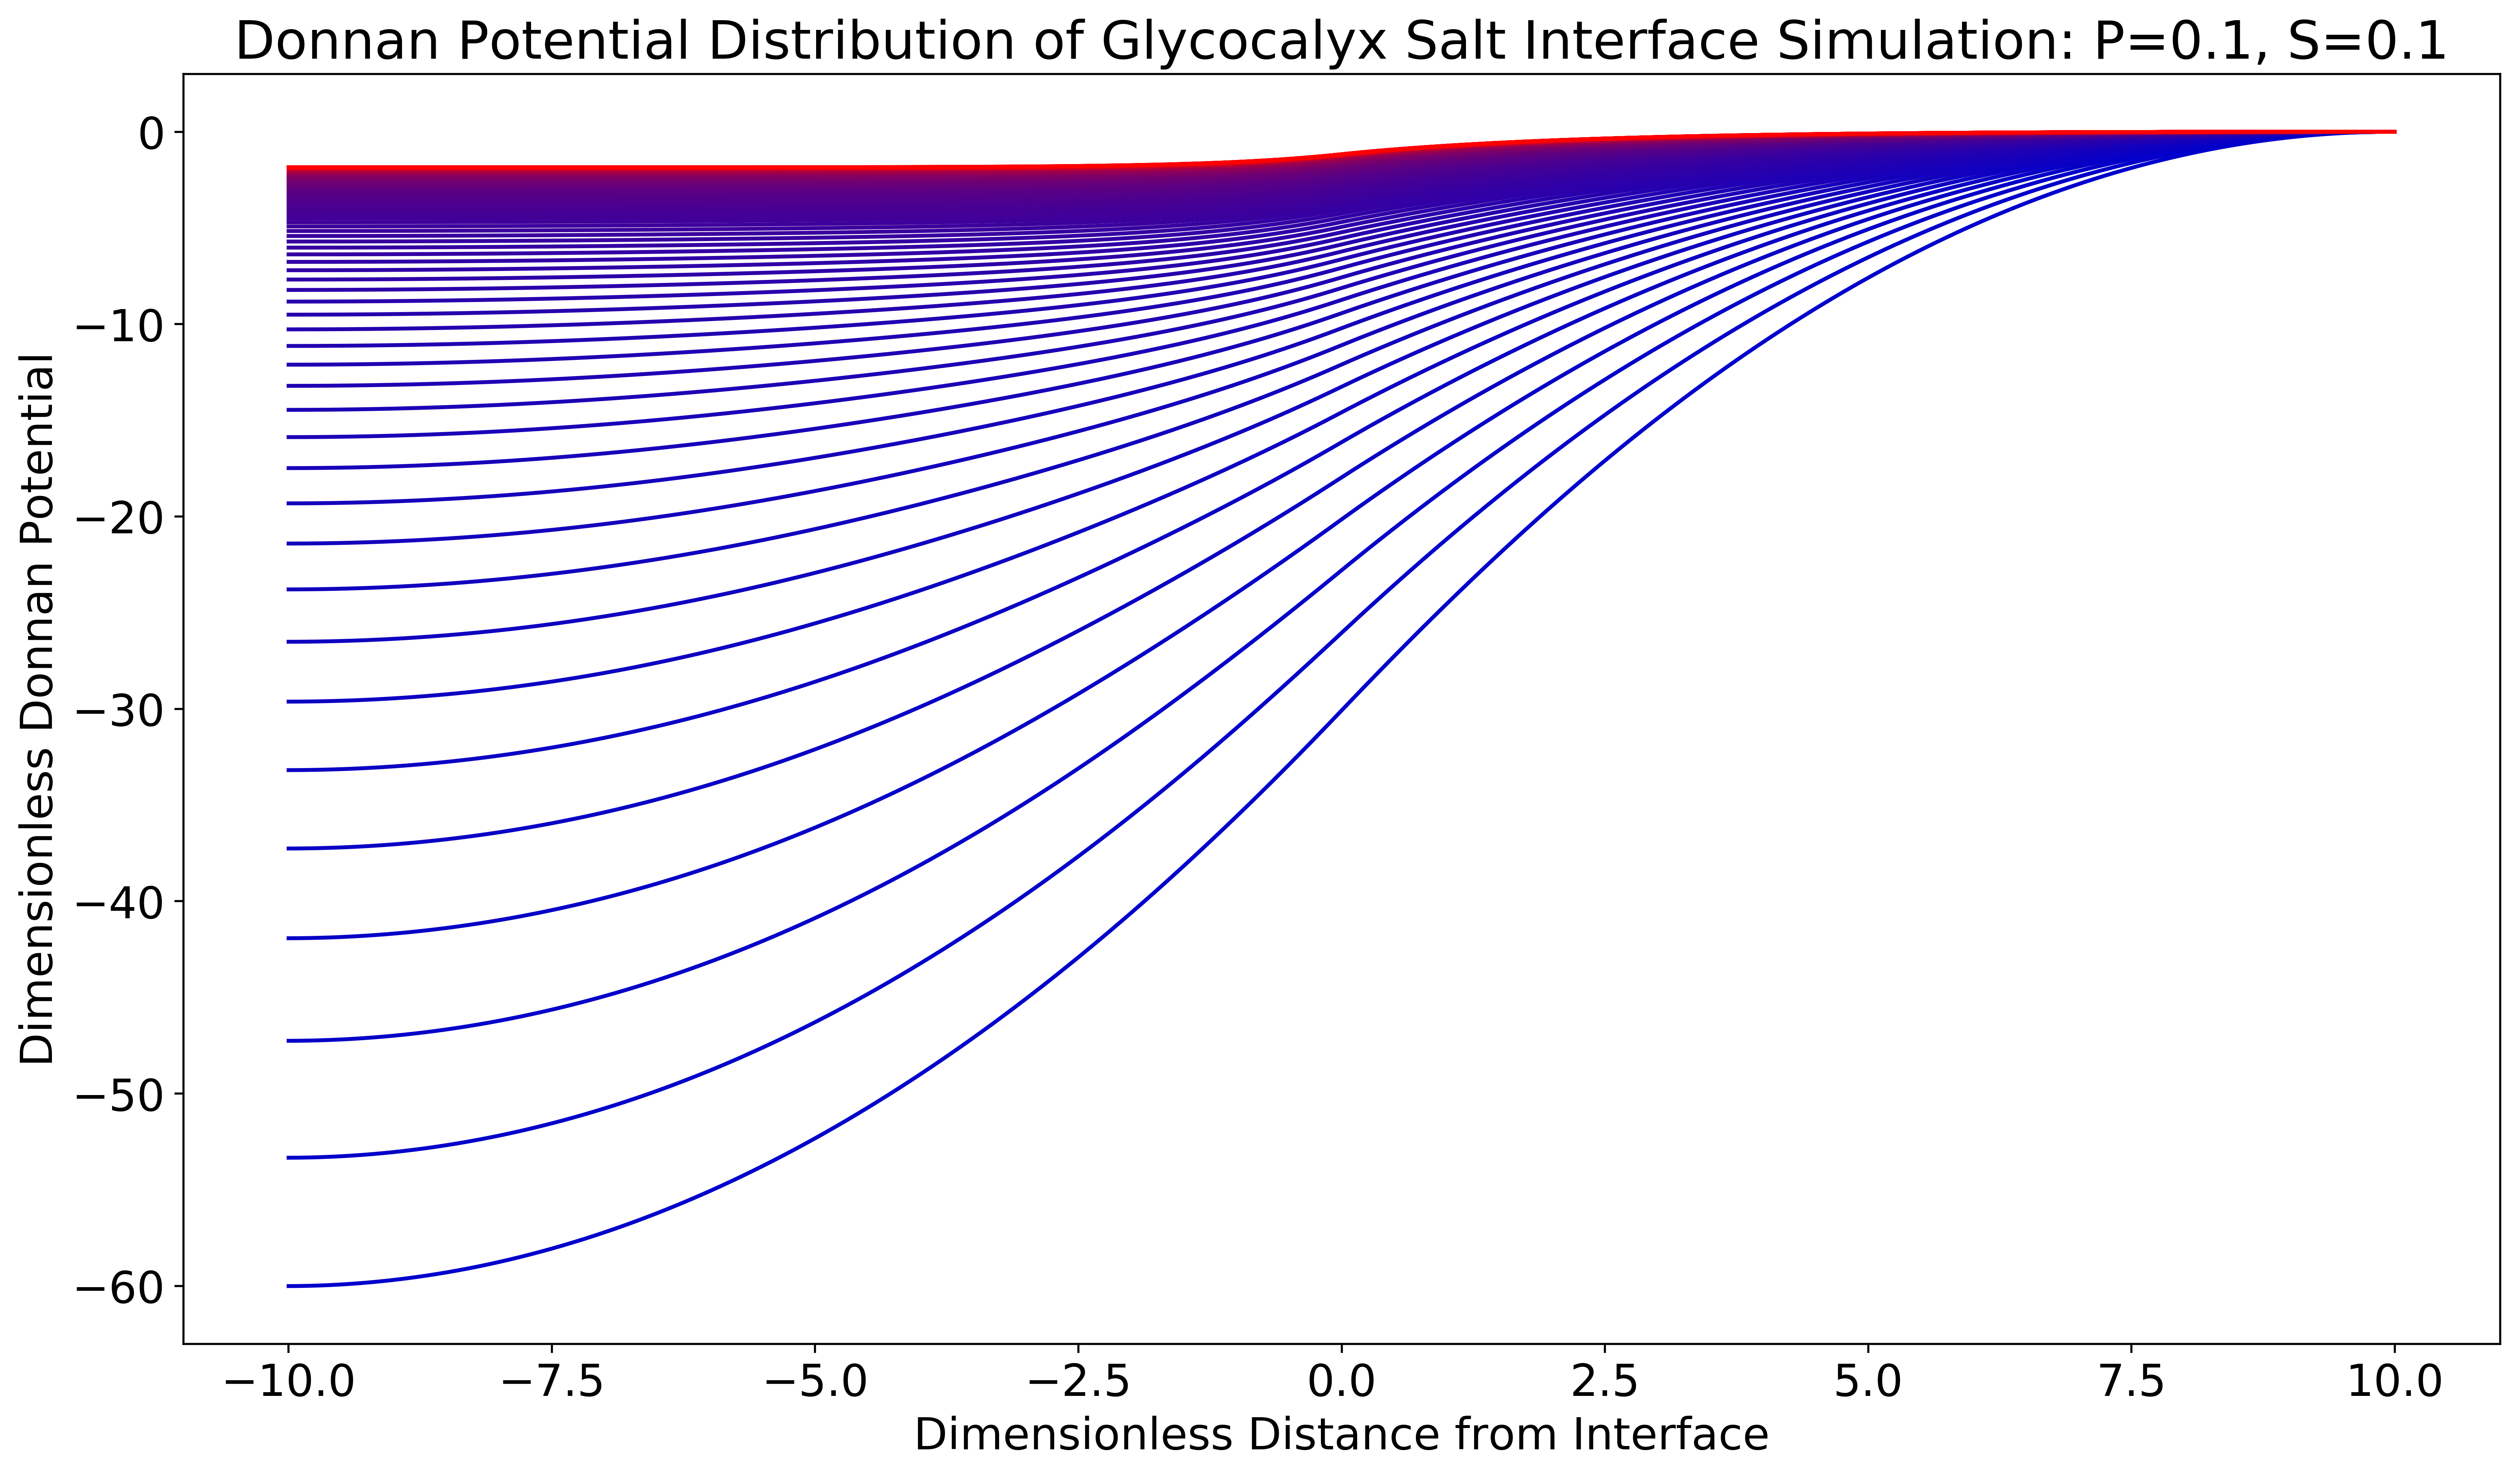

In [17]:
#------------------------
# SIMULATION STARTS HERE
#------------------------
dCsdt = np.empty(n+m+1)
dCcdt = np.empty(n+m+1)
dCadt = np.empty(n+m+1)

plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(16, 9), dpi = 500)
plt.xlabel('Dimensionless Distance from Interface')
plt.ylabel('Dimensionless Donnan Potential')
plt.title('Donnan Potential Distribution of Glycocalyx Salt Interface Simulation: P='+ str(P) + ', S=' + str(S))

for j in range(len(time)):
    
    if (j*dt)%1 == 0:
        print(j/2000)
    # calculate the electric field and gradient
    # -----------------------------------------
    d2Phdx2 = F/(-e*e0)*(-Cs+Cc-Ca)/Cs0
    dPhdx = np.cumsum(d2Phdx2)*dx
    
    # calculate the gradients of each concentration
    # ------------------------------------------
    dCcdx = np.gradient(Cc, dx, edge_order=2)
    dCcdx[0] = 0
    dCcdx[-1] = 0
    
    d2Ccdx2 = np.gradient(dCcdx, dx, edge_order=2)
    d2Ccdx2[0] = 0
    d2Ccdx2[-1] = 0
    
    dCadx = np.gradient(Ca, dx, edge_order=2)
    dCadx[0] = 0
    dCadx[-1] = 0
    
    d2Cadx2 = np.gradient(dCadx, dx, edge_order=2)
    d2Cadx2[0] = 0
    d2Cadx2[-1] = 0

    dCsdt = -k1*Cs*Cc+k2*(totalCs-Cs)
    dCcdt = +uc*Cc*d2Phdx2+uc*dCcdx*dPhdx+Dc*d2Ccdx2+dCsdt
    dCadt = -ua*Ca*d2Phdx2-ua*dCadx*dPhdx+Da*d2Cadx2

        
    # calculate further derivatives
    # -----------------------------------------
    d2Ccdt2 = np.gradient(dCcdt, dt, edge_order=2)
    d2Ccdt2[-1] = 0
    
    d2Cadt2 = np.gradient(dCadt, dt, edge_order=2)
    d2Cadt2[-1] = 0
    
    
    # Update values to next time step
    # -----------------------------------------
    Cs = Cs + dCsdt*dt
    Cc = Cc + dCcdt*dt + 0.5*d2Ccdt2*dt**2
    Ca = Ca + dCadt*dt + 0.5*d2Cadt2*dt**2

    for i in range(len(x)):
        Cs[i] = max(0, Cs[i])
        Cc[i] = max(0, Cc[i])
        Ca[i] = max(0, Ca[i])
    
    
    if j%500 == 0:
        b = (1-j/len(time)) *0.8
        g =0
        r = j/len(time)
        c = (r, g, b)
        dPhdx[:n+1] -= np.min(dPhdx[:n+1])
        dPhdx[n+1:] -= np.min(dPhdx[n+1:])
        Ph = np.cumsum(dPhdx)*dx
        Ph = Ph-Ph[-1]
        print(Ph[0])
        plt.plot(x, Ph, color=c, label = r" $Donnan Potential Distribution$ ")
plt.savefig('transient results disturbed wave.jpg')

## 2. Final System

### 2.1 Final Concentrations

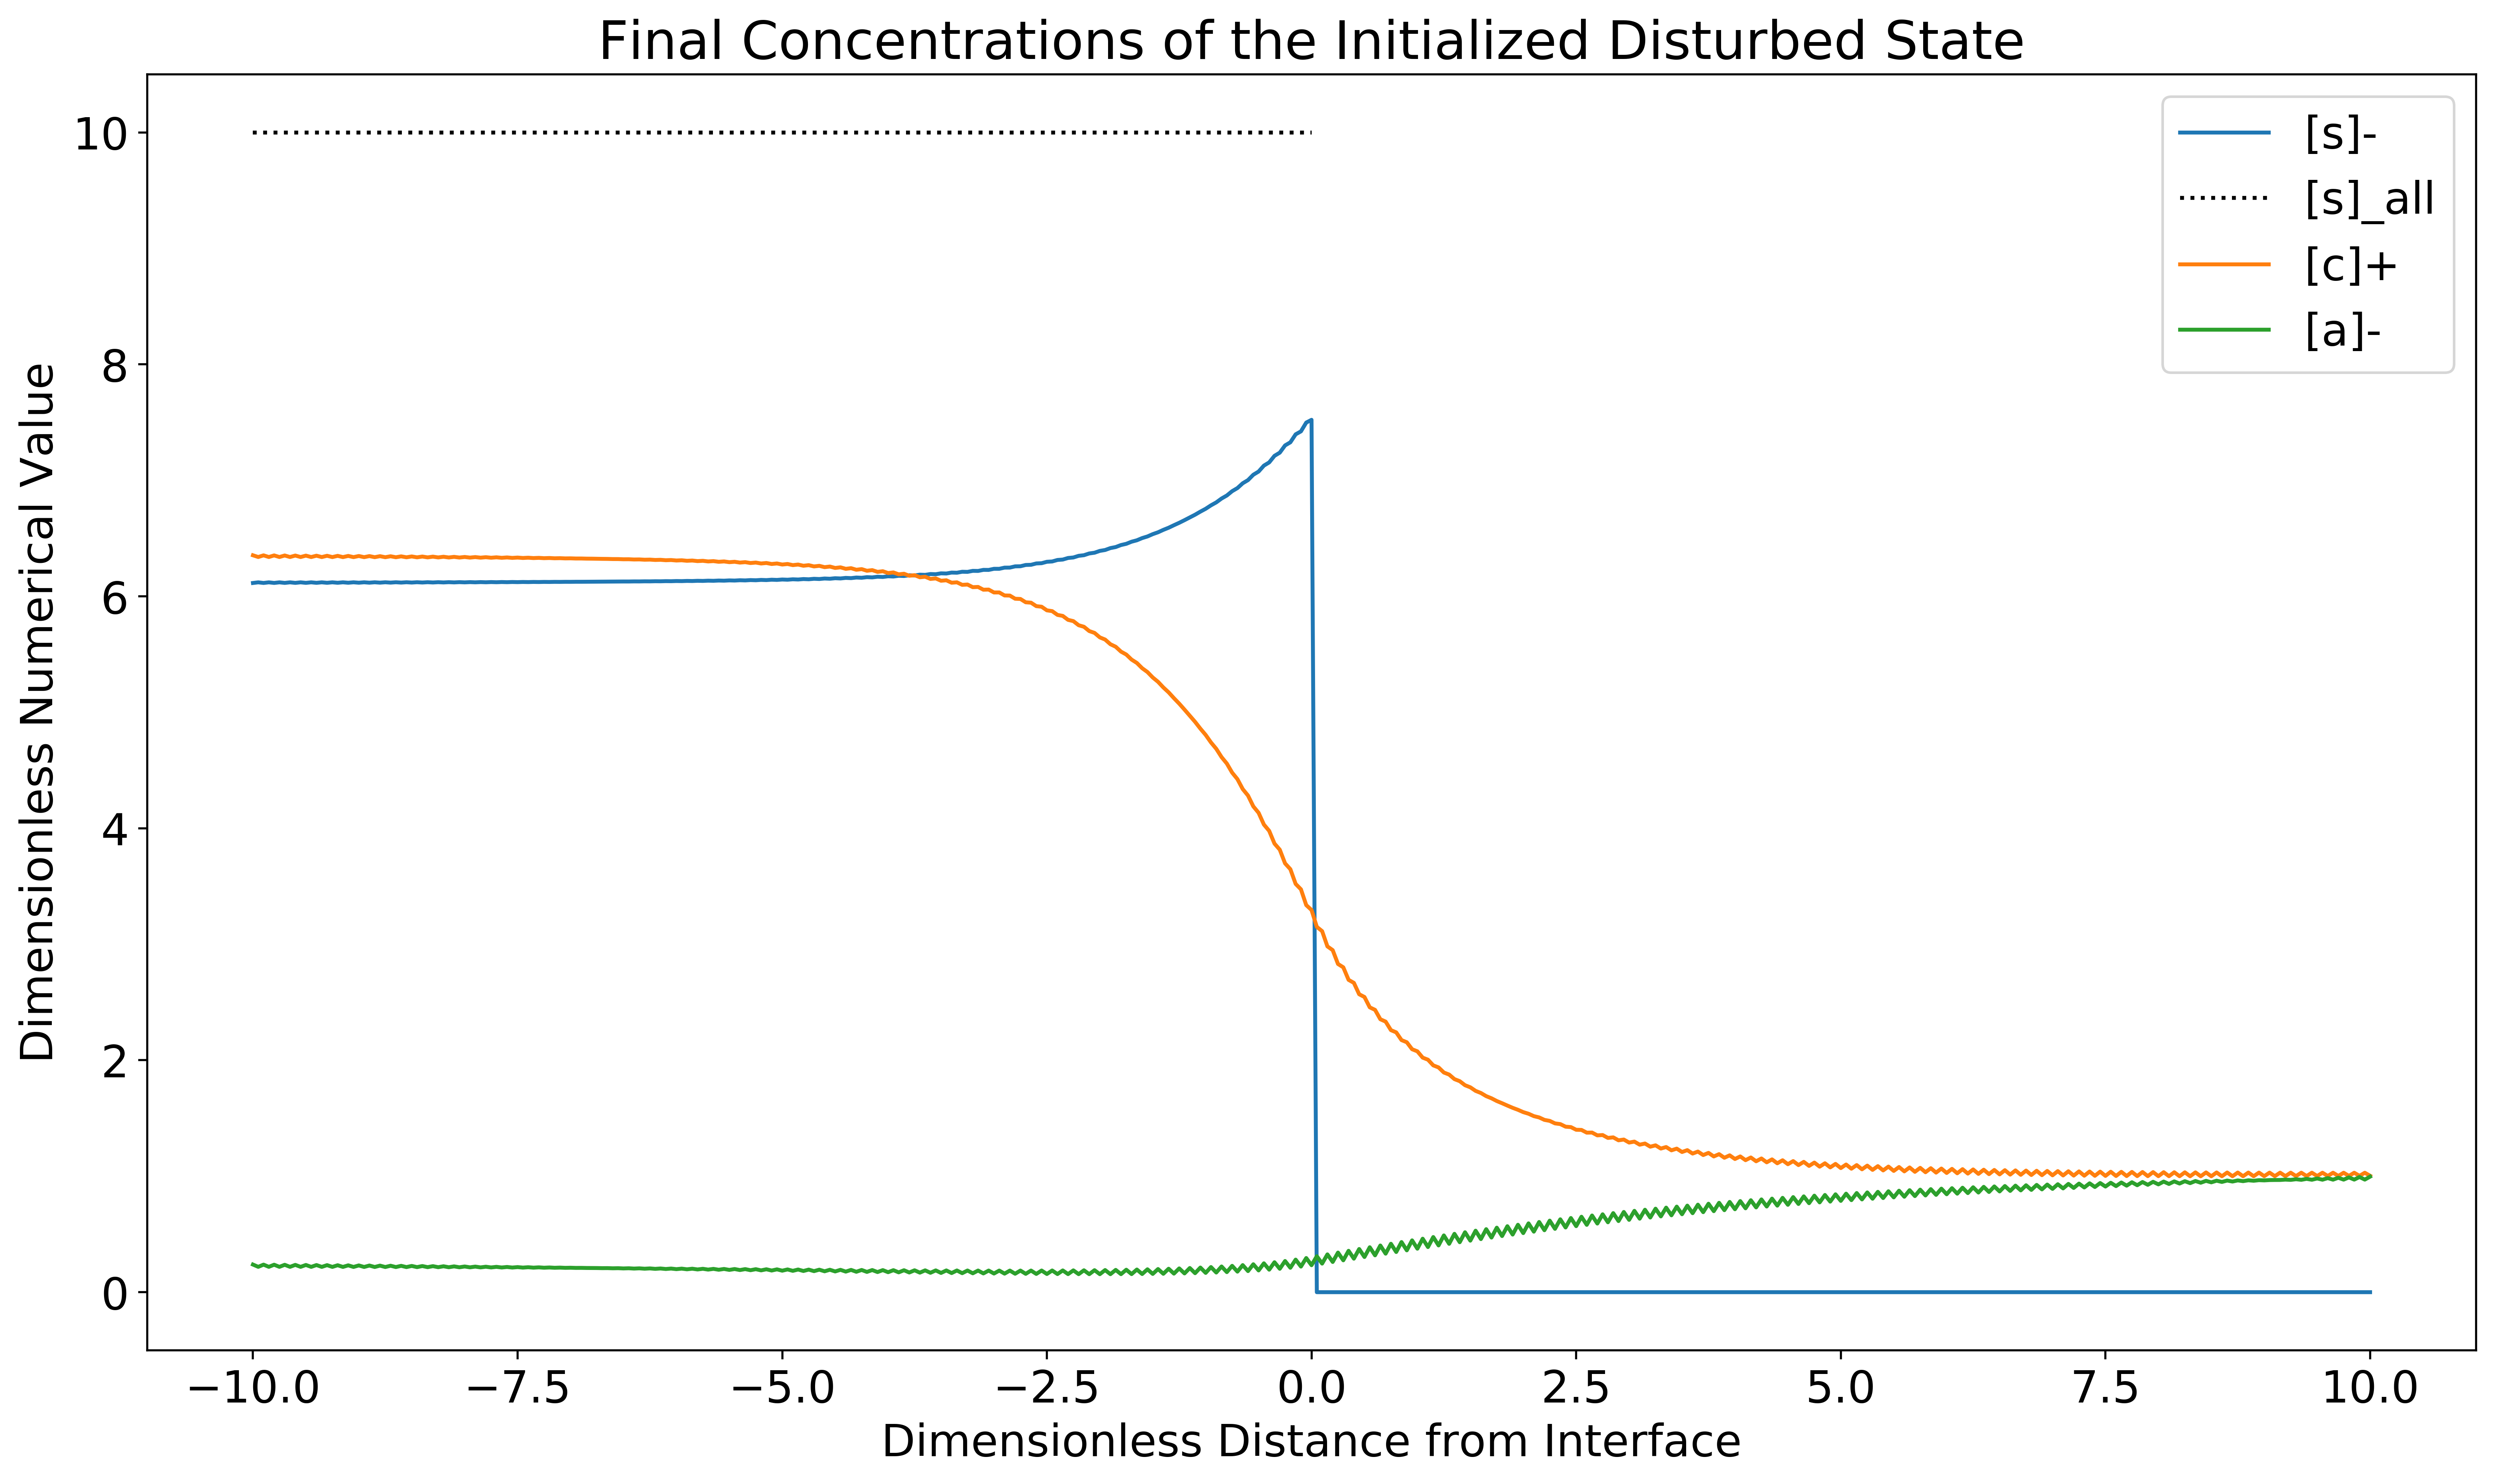

In [21]:
# Plot Results
#------------------------
# Concentrations
plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(16, 9), dpi=500)

plt.plot(x, Cs, color='C0', label="[s]-")
plt.plot([x[0], 0], [Cs0, Cs0], 'k:', label="[s]_all")
plt.plot(x, Cc, color='C1', label="[c]+")
plt.plot(x, Ca, color='C2', label="[a]-")
plt.xlabel('Dimensionless Distance from Interface')
plt.ylabel('Dimensionless Numerical Value')
plt.title("Final Concentrations of the Initialized Disturbed State")
plt.legend()
plt.savefig('transient results disturbed concentrations.jpg')

### 2.2 Final Potential

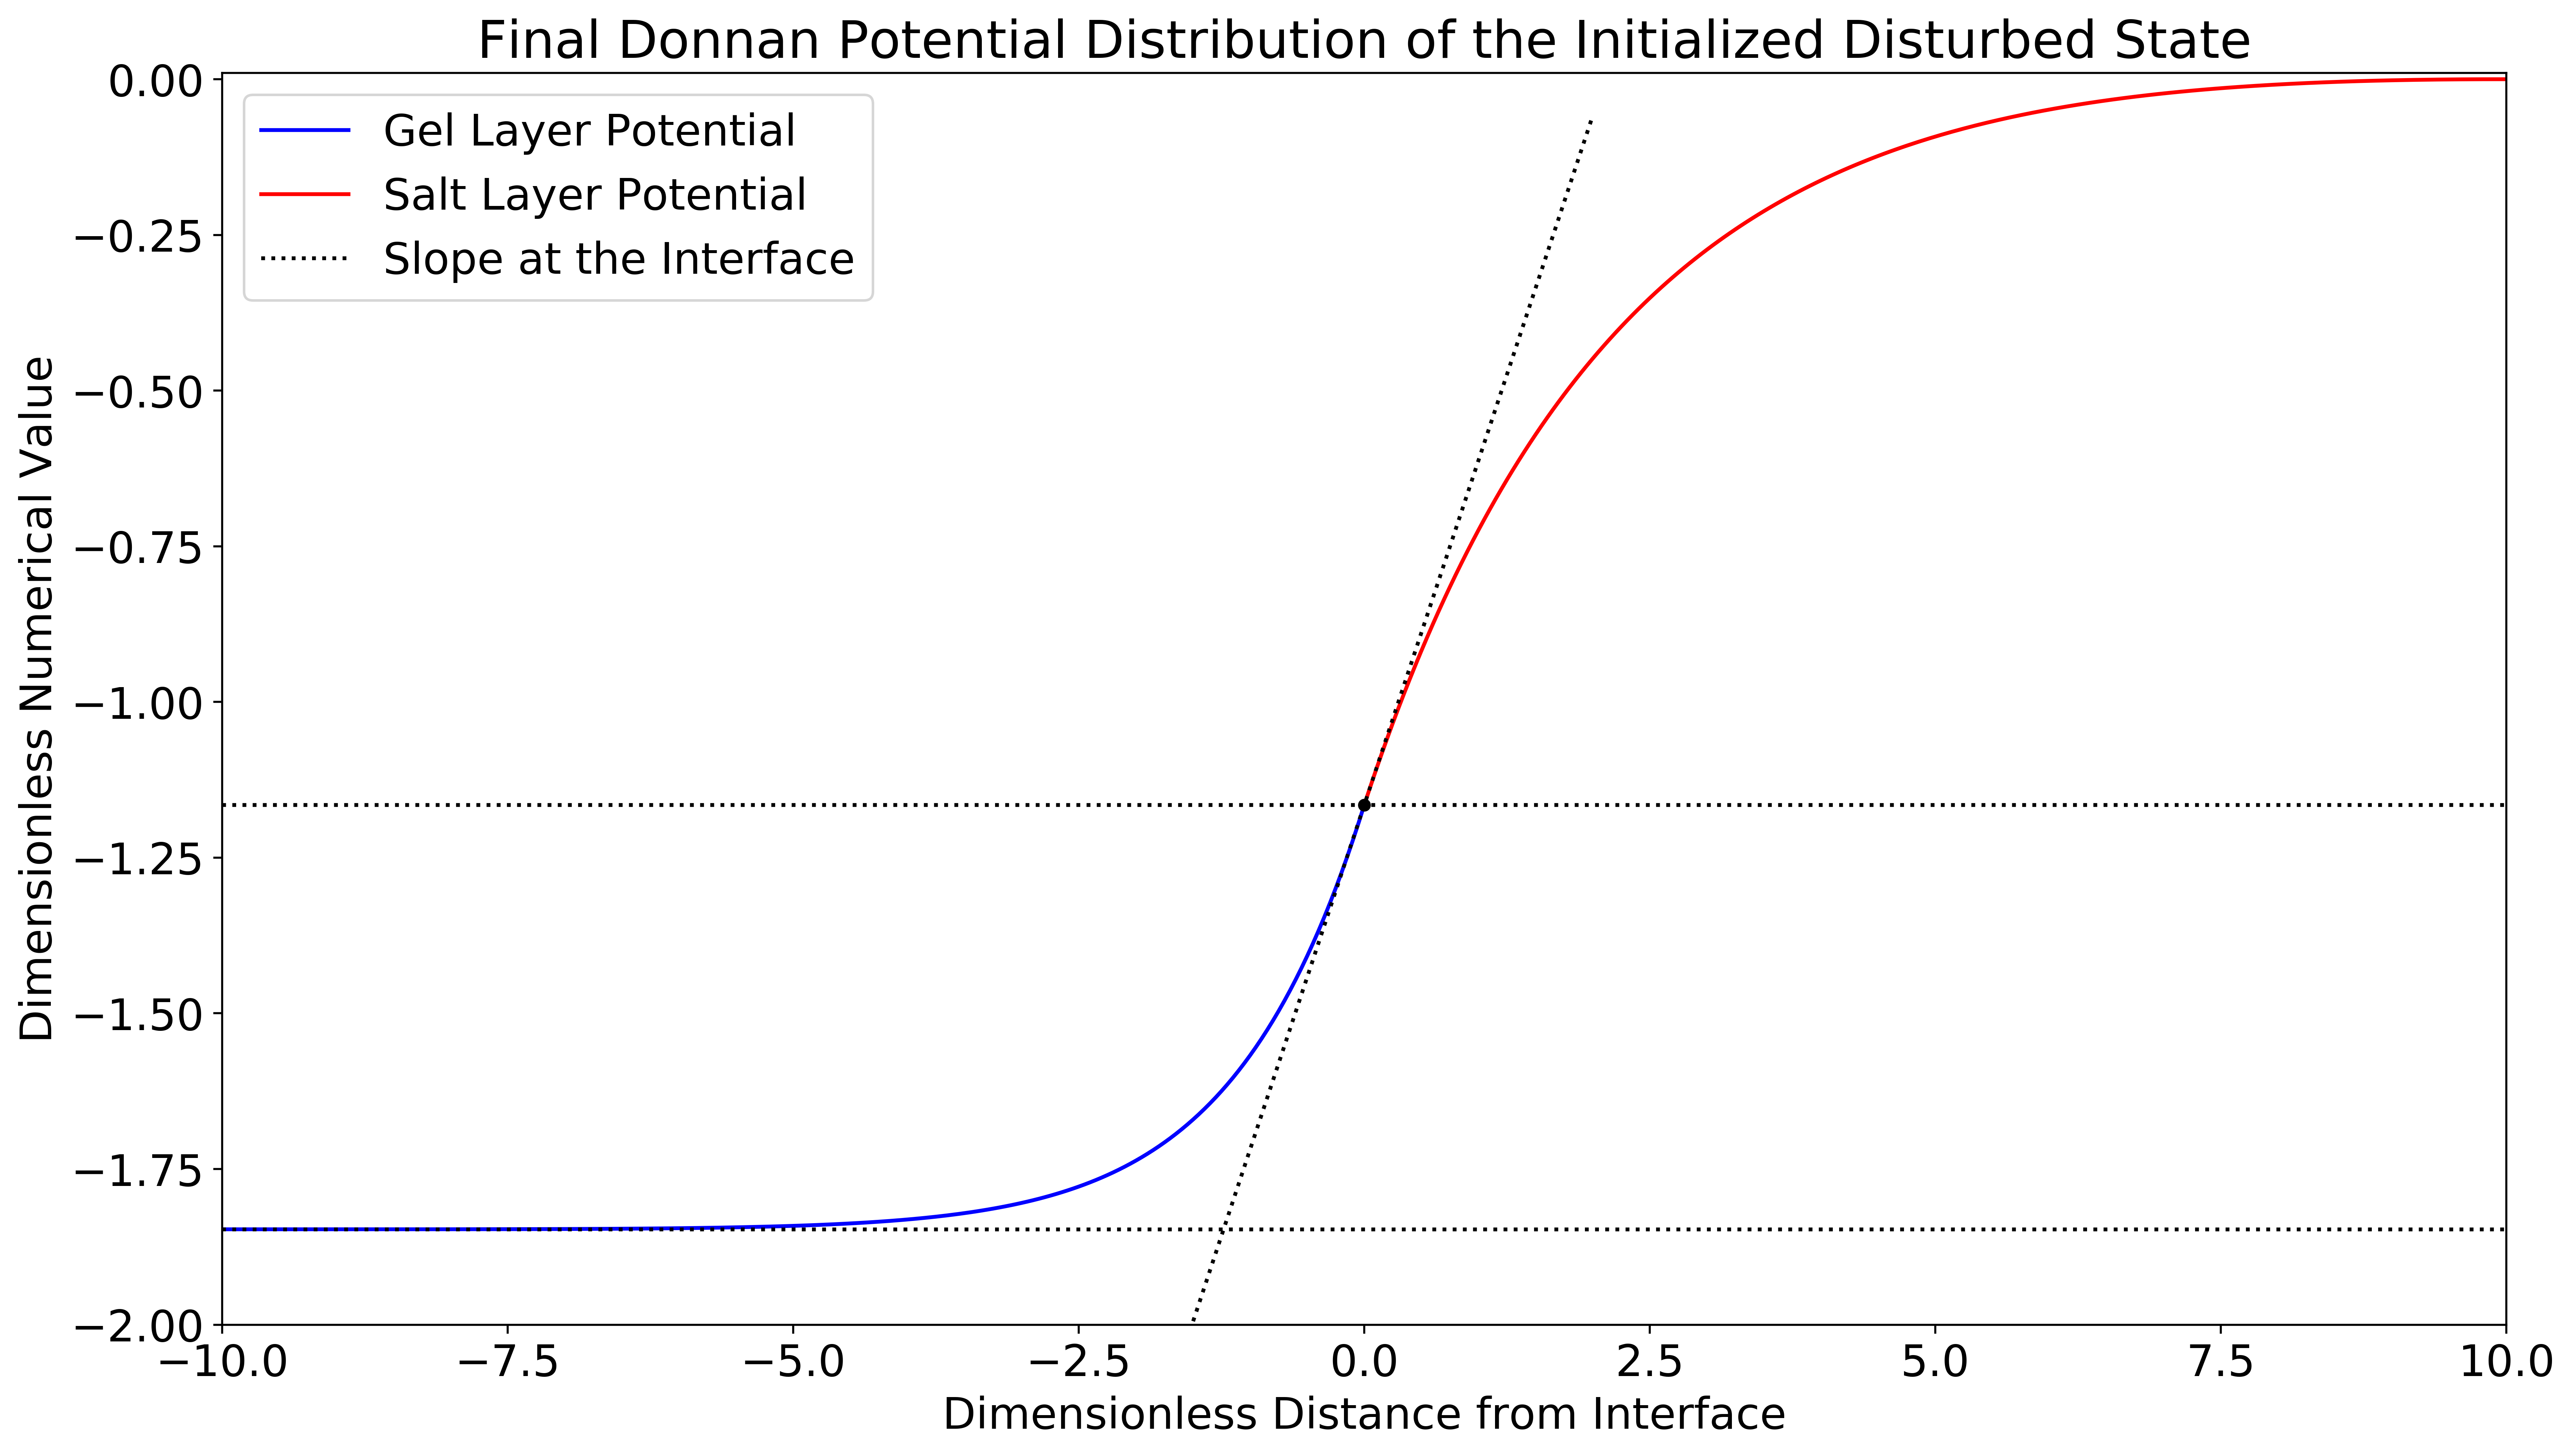

In [23]:
# Compute the Potential
dPhdx[:n+1] -= np.min(dPhdx[:n+1])
dPhdx[n+1:] -= np.min(dPhdx[n+1:])
Ph = np.cumsum(dPhdx)*dx
Ph = Ph-Ph[-1]

xi = np.linspace(-2,2, num=2)
slope = (Ph[n+1]-Ph[n])/dx
yi = slope*xi+Ph[n]

# Plot the Potential with Annotations
plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(16, 9), dpi=500)

plt.plot(x[:n+1], Ph[:n+1], 'b', label='Gel Layer Potential')
plt.plot(x[n:], Ph[n:], 'r', label='Salt Layer Potential')
plt.plot(xi, yi, 'k:', label = 'Slope at the Interface')
plt.plot(0, Ph[n], 'ko', ms=4)
plt.plot([x[0], x[-1]], [Ph[n], Ph[n]], 'k:')
plt.plot([x[0], x[-1]], [np.min(Ph), np.min(Ph)], 'k:')
plt.xlabel('Dimensionless Distance from Interface')
plt.ylabel('Dimensionless Numerical Value')
plt.title("Final Donnan Potential Distribution of the Initialized Disturbed State")
plt.legend()
plt.xlim(x[0], x[-1])
plt.ylim(-2, 0.01)

plt.savefig('transient results disturbed derivs.jpg')

### 2.3 Relevant Graphs of Donnan Potential

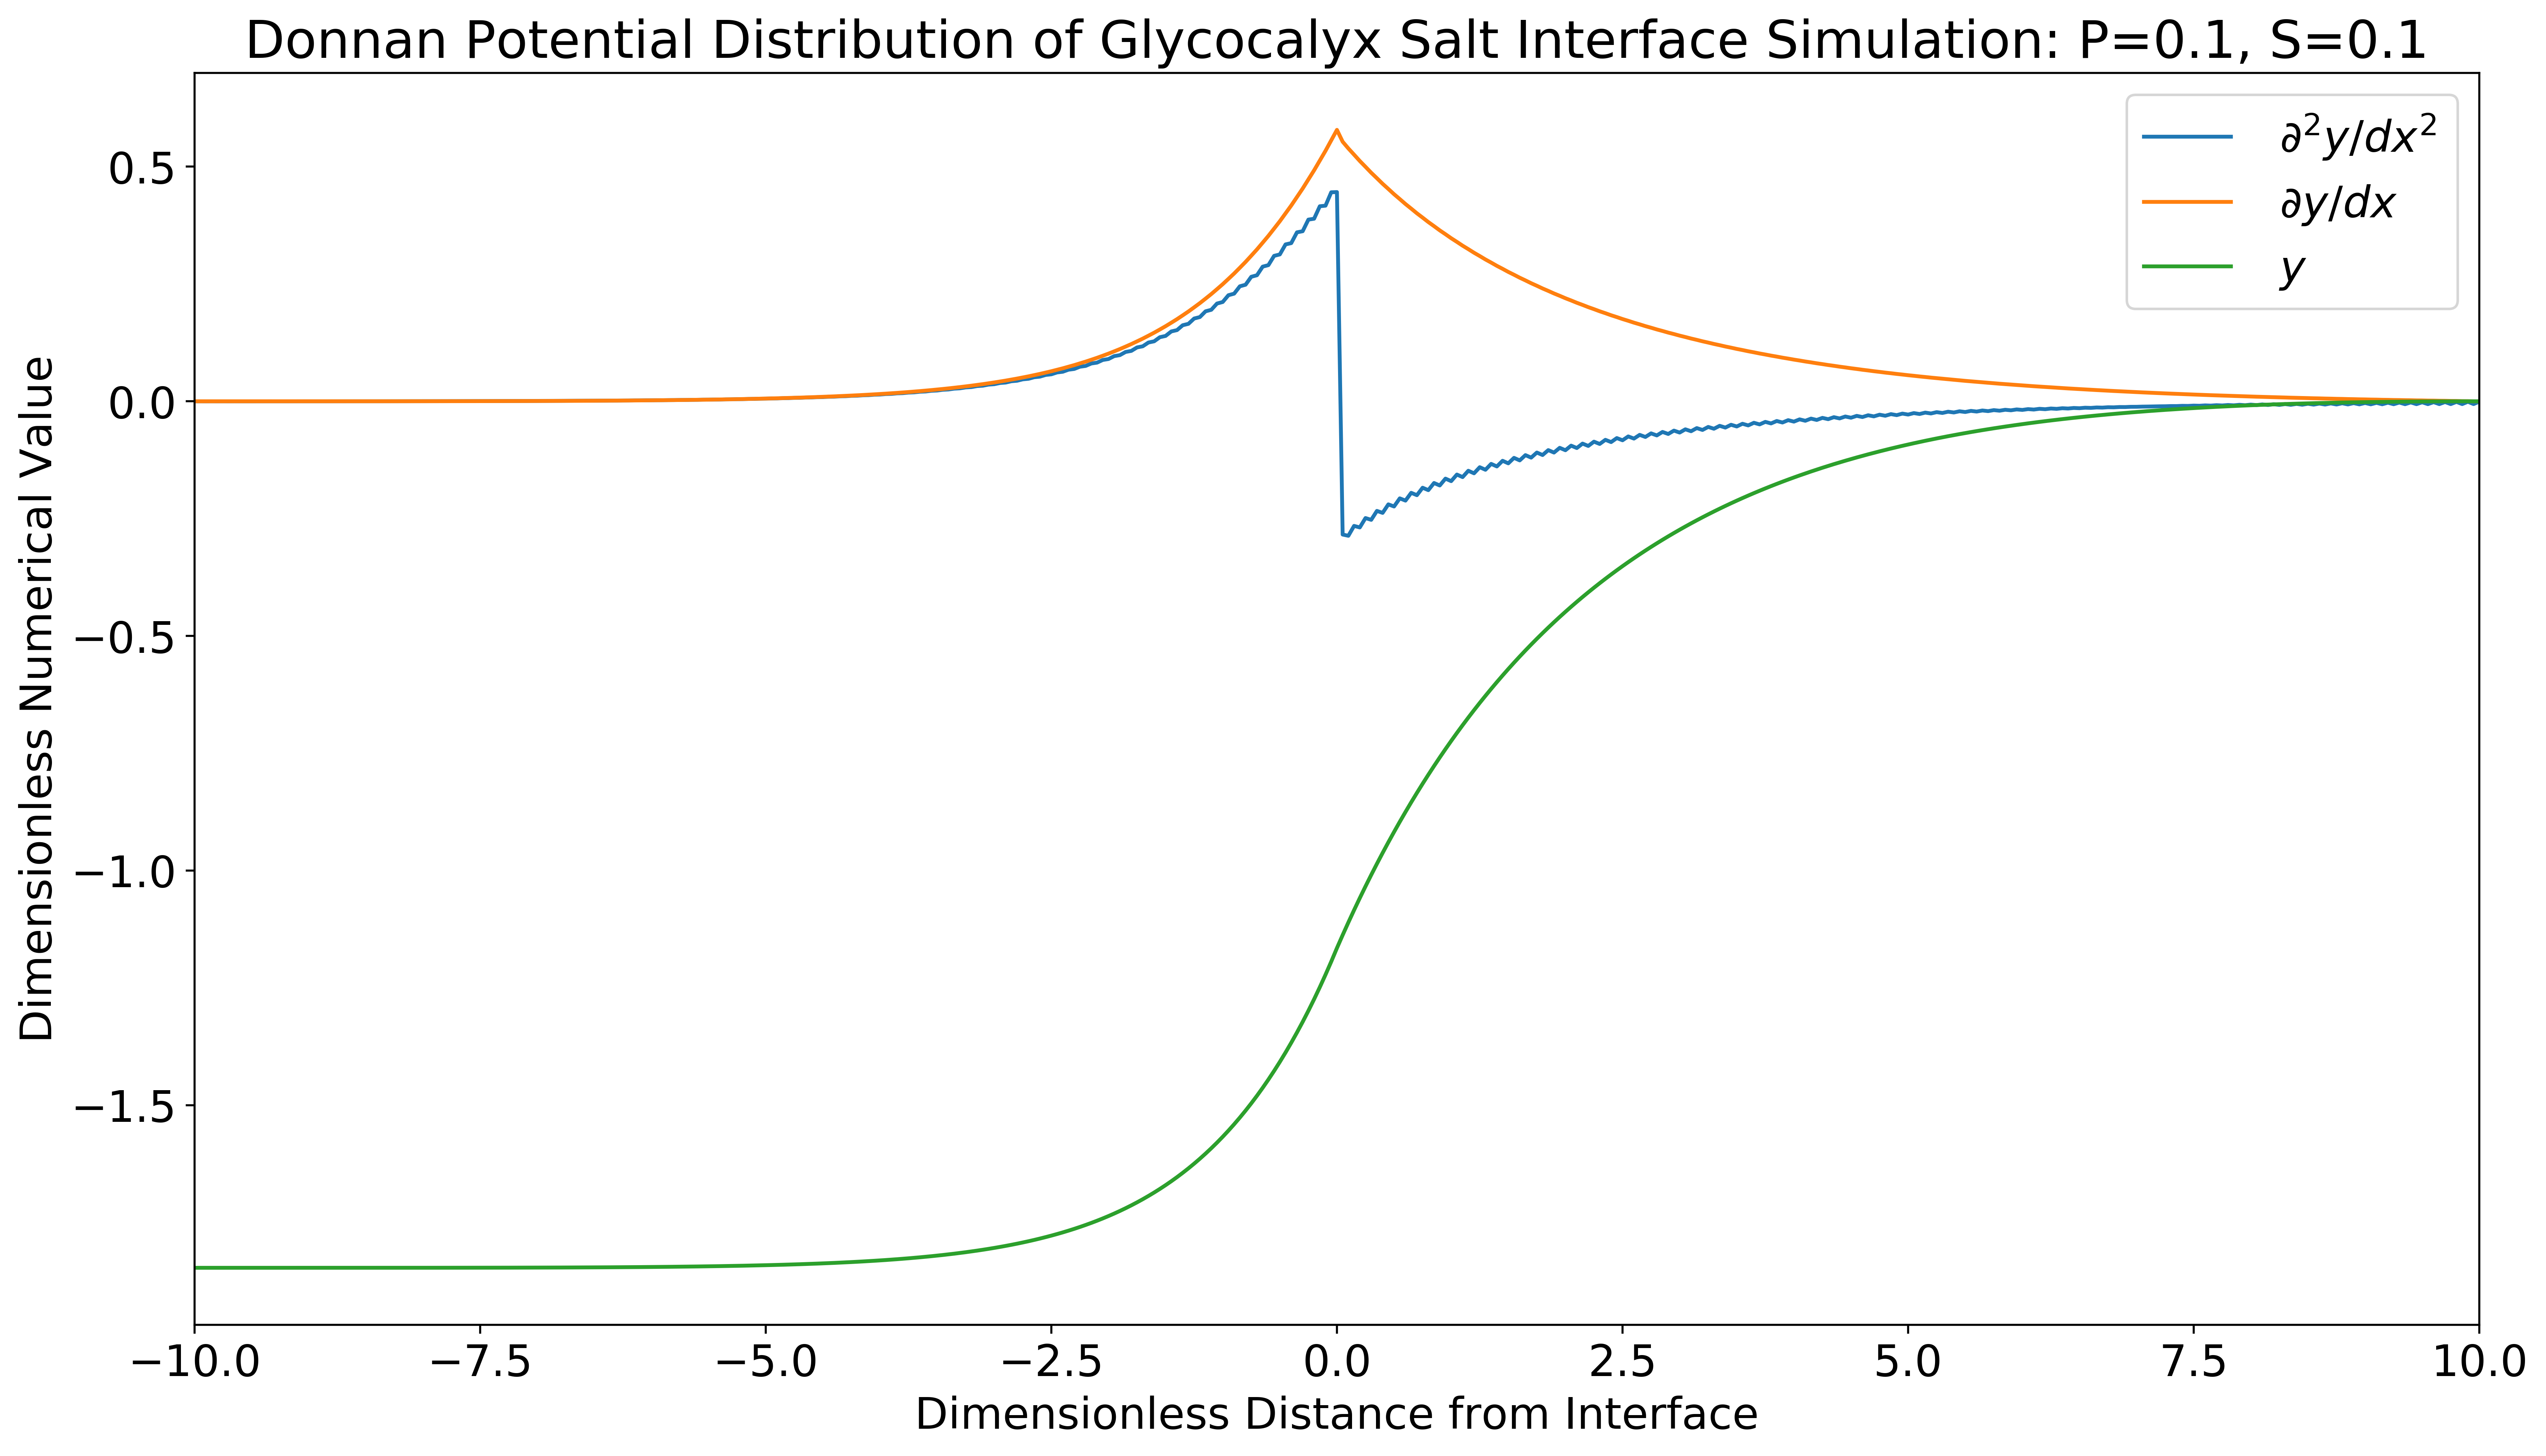

In [20]:
# Plot Potential / Field / Gradient
plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(16, 9), dpi=500)
plt.title('Donnan Potential Distribution of Glycocalyx Salt Interface Simulation: P='+ str(P) + ', S=' + str(S))
plt.plot(x, d2Phdx2, label=r" $\partial^2 y / dx^2$ ")
plt.plot(x, dPhdx, label = r" $\partial y / dx$ ")
plt.plot(x, Ph, label = r" $y$ ")
plt.xlabel('Dimensionless Distance from Interface')
plt.ylabel('Dimensionless Numerical Value')
plt.legend()
plt.xlim(x[0], x[-1])

plt.savefig('transient disturbed results.jpg')